In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_list=[]
for i in range(1,8):
    try:
        data=pd.read_csv(r'E:\3cschool\python_shuju_0\fangchan\lianjia{}.csv'.format(i),encoding='gbk')
    except:
        data=pd.read_csv(r'E:\3cschool\python_shuju_0\fangchan\lianjia{}.csv'.format(i))
    data_list.append(data)

In [3]:
len(data_list)

7

In [4]:
data=pd.concat(data_list)

In [5]:
data.head(2)

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道


In [6]:
data=data[['cjdanjia','cjxiaoqu','cjlouceng','bankuai','xingming','cjzongjia','congyenianxian']]

In [7]:
data.head(2)

,cjdanjia,cjxiaoqu,cjlouceng,bankuai,xingming,cjzongjia,congyenianxian
0,43997元/平,红莲北里 3室1厅 57平,南 北/高楼层/6层,马连道,郭海龙,251.0,4-5年
1,36969元/平,红莲南里 1室1厅 43平,南/高楼层/7层,马连道,郭海龙,159.0,4-5年


In [8]:
(data.isnull()).sum()

cjdanjia             2
cjxiaoqu             2
cjlouceng            2
bankuai           1322
xingming             2
cjzongjia            2
congyenianxian       2
dtype: int64

In [9]:
data=data.dropna(how='all')

In [10]:
(data.isnull()).sum()

cjdanjia             0
cjxiaoqu             0
cjlouceng            0
bankuai           1320
xingming             0
cjzongjia            0
congyenianxian       0
dtype: int64

In [11]:
data.duplicated().sum()

19754

In [12]:
data.sort_values(by='bankuai',inplace=True) #默认将nan值排到最后，这样去重时bankuai默认取第一个

In [13]:
data.drop_duplicates(subset=['cjdanjia','cjxiaoqu','cjlouceng'],inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.cjdanjia.str.replace('元/平','')

18111    34464
38119    53131
38118    55312
38117    66485
38116    55738
38115    58156
38114    57969
38113    59409
38112    65877
38111    73311
38110    90186
38109    86207
38108    79265
38107    25791
50857    60177
50856    56897
50855    60527
50854    65498
10329    40265
10328    30426
10327    50942
10326    51949
10325    33787
10324    49238
38120    50943
10323    47068
10321    48248
10320    41637
10319    46879
10318    42388
         ...  
6639     17565
6640     24176
6641     42057
6642     28359
6643     21405
6644     27969
6645     17872
6646     20092
6647     48226
6650     60621
6651     74834
6654     62106
6655     51492
6660     72686
6661     22503
6662     55275
6663     73086
6664     59962
6665     50218
6666     60186
6667     97544
6668     52632
6669     57294
6670     27692
6671     51359
6672     26099
6673     18462
6674     15696
6675     14901
6676     12467
Name: cjdanjia, Length: 142214, dtype: object

In [16]:
data.cjdanjia.str.replace('元/平','').astype(np.float32)

18111    34464.0
38119    53131.0
38118    55312.0
38117    66485.0
38116    55738.0
38115    58156.0
38114    57969.0
38113    59409.0
38112    65877.0
38111    73311.0
38110    90186.0
38109    86207.0
38108    79265.0
38107    25791.0
50857    60177.0
50856    56897.0
50855    60527.0
50854    65498.0
10329    40265.0
10328    30426.0
10327    50942.0
10326    51949.0
10325    33787.0
10324    49238.0
38120    50943.0
10323    47068.0
10321    48248.0
10320    41637.0
10319    46879.0
10318    42388.0
          ...   
6639     17565.0
6640     24176.0
6641     42057.0
6642     28359.0
6643     21405.0
6644     27969.0
6645     17872.0
6646     20092.0
6647     48226.0
6650     60621.0
6651     74834.0
6654     62106.0
6655     51492.0
6660     72686.0
6661     22503.0
6662     55275.0
6663     73086.0
6664     59962.0
6665     50218.0
6666     60186.0
6667     97544.0
6668     52632.0
6669     57294.0
6670     27692.0
6671     51359.0
6672     26099.0
6673     18462.0
6674     15696

In [17]:
data['cjdanjia']=data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x:round( x/10000,2))

In [18]:
data.head(3)

,cjdanjia,cjxiaoqu,cjlouceng,bankuai,xingming,cjzongjia,congyenianxian
18111,3.45,麦子店街 2室1厅 52平,南 北/低楼层/6层,CBD,王海涛,182.0,5年以上
38119,5.31,合生国际花园 2室2厅 104平,南/中楼层/18层,CBD,李铁岗,555.0,4-5年
38118,5.53,富力城B区 3室2厅 148平,东 南/中楼层/12层,CBD,李铁岗,820.0,4-5年


In [19]:
data=data[data.cjdanjia>0.5]

In [20]:
len(data)

141154

In [21]:
(data.cjlouceng.str.split('/').map(len)!=3).sum()

0

In [22]:
data=data.assign(chaoxiang=data.cjlouceng.map(lambda x: x.split('/')[0])) #增加朝向列
data=data.assign(louceng=data.cjlouceng.map(lambda x: x.split('/')[1]))

In [23]:
data.head(2)

,cjdanjia,cjxiaoqu,cjlouceng,bankuai,xingming,cjzongjia,congyenianxian,chaoxiang,louceng
18111,3.45,麦子店街 2室1厅 52平,南 北/低楼层/6层,CBD,王海涛,182.0,5年以上,南 北,低楼层
38119,5.31,合生国际花园 2室2厅 104平,南/中楼层/18层,CBD,李铁岗,555.0,4-5年,南,中楼层


分析成交量超过一亿的经纪人相关因素

In [24]:
#如：CBD板块 哪些经纪人成交总价超过1亿

In [25]:
data_group=data.groupby(['bankuai','xingming'])['cjzongjia'].sum()

In [26]:
data_group

bankuai  xingming
CBD      丁炜           1552.800
         丁美玉          1211.500
         何丽丽          9068.000
         刘俊微          8950.500
         刘凯            565.000
         刘帅伟          2137.000
         刘艳丽          3059.500
         卢军旗          3932.000
         吴敏           7827.500
         姜昭辉           930.000
         孔令光          4791.500
         孔飞           1716.000
         孙宁           6969.500
         孙朋威          3002.000
         孙朝阳          2987.000
         宋立付          7800.000
         崔旭锋          2842.700
         庞静           5650.930
         张建           2014.000
         张志杰          3091.500
         徐占玉          2821.000
         惠书夺          2620.000
         李东           2345.000
         李振龙          4846.884
         李铁岗         14532.080
         桑婷婷          9193.000
         牛树河          5901.800
         王东学         10232.700
         王伟           2282.087
         王太朋          3125.000
                       ...    
鼓楼大街     李栋楹         

In [27]:
data_group[data_group>10000]

bankuai  xingming
CBD      李铁岗         14532.080
         王东学         10232.700
         王辰          12742.000
七里庄      刘淼          11794.600
         姜彩波         10180.300
         赵静          11152.500
         邝征军         10071.000
万寿路      杨会云         15971.700
         计禹龙         14761.300
万柳       何延芬         17022.800
         刘琳琳         17848.800
         史东东         13359.000
         宋凯歌         10328.700
         朱俊琴         11297.800
         江滨          14026.790
         潘建伟         10653.000
         王利军         15436.500
         葛开灯         14725.000
         谢凯          10833.000
         赵翠玲         13712.700
         赵鑫          12929.000
三元桥      冯先庆         10079.500
         孟凡龙         11750.000
         崔伟伟         14428.000
         魏英芬         26312.000
三里屯      史大伟         15957.500
         罗银          10178.500
上地       崔玉风         10285.000
         康晓亮         14525.150
         张瑞民         11117.500
                       ...    
魏公村      周立平         

In [28]:
# 成交总价与从业年限的关系

In [29]:
data_1w=data.pivot_table(index='xingming',columns='congyenianxian',values='cjzongjia',aggfunc=sum)

In [30]:
data_1w

congyenianxian,1-2年,2-3年,3-4年,4-5年,5年以上,<1年
xingming,,,,,,
丁一,NaN,NaN,1760.000,NaN,NaN,NaN
丁丽,NaN,NaN,NaN,NaN,3115.000,NaN
丁乾浩,NaN,NaN,NaN,NaN,NaN,411.0
丁云朋,1950.0,NaN,NaN,NaN,NaN,NaN
丁光明,4284.0,NaN,NaN,NaN,NaN,NaN
丁凡顺,NaN,NaN,NaN,NaN,6754.525,NaN
丁向锋,2844.0,NaN,NaN,NaN,NaN,NaN
丁壮,NaN,4170.0,NaN,NaN,NaN,NaN
丁学峰,NaN,NaN,3249.600,NaN,NaN,NaN


In [31]:
(data_1w>10000).sum()

congyenianxian
1-2年     26
2-3年     13
3-4年    109
4-5年    172
5年以上    716
<1年       1
dtype: int64

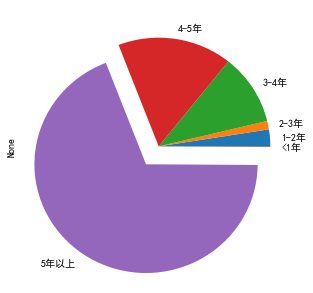

In [39]:
plt.rcParams['font.sans-serif']=['SimHei']
(data_1w>10000).sum().plot.pie(figsize=(5,5),explode=(0,0,0,0,0.2,0))